## Dataset

In [17]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [18]:
train_labels = []
train_samples = []

Dataset:

* Experimental drug test from ages 13 to 100
* 2100 participants, half were under 65 or older

In [19]:
for i in range(50):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [20]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [21]:
# Creates 0-1 scaled data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

## Simple tf.keras Sequential Model

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [23]:
# physical_devices = tf.config.experimental.list_physical_devices('gpu')
# print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

Sequential Model: 

* Sequential Model: Linear Stack of Layers
* Dense Layer 1: First Hidden Layer
* Units: Nodes or Neurons
* Last Dense Layer: Possible Output Classes 

In [24]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## Train the Model

In [26]:
# Model.compile: Prepares model for training
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])                

* batch_size: how many samples are included in one batch to be passed and processed by the network at one time
* epochs: model is going to prcess or train on all of the data in the data set that times before completing the total training
* verbose: allows to see output from whenever we run this fit function 

In [15]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 0s - loss: 0.2427 - accuracy: 0.9438
Epoch 2/30
210/210 - 0s - loss: 0.2422 - accuracy: 0.9433
Epoch 3/30
210/210 - 0s - loss: 0.2417 - accuracy: 0.9433
Epoch 4/30
210/210 - 0s - loss: 0.2413 - accuracy: 0.9433
Epoch 5/30
210/210 - 0s - loss: 0.2408 - accuracy: 0.9433
Epoch 6/30
210/210 - 0s - loss: 0.2404 - accuracy: 0.9433
Epoch 7/30
210/210 - 0s - loss: 0.2401 - accuracy: 0.9433
Epoch 8/30
210/210 - 0s - loss: 0.2396 - accuracy: 0.9433
Epoch 9/30
210/210 - 0s - loss: 0.2394 - accuracy: 0.9433
Epoch 10/30
210/210 - 0s - loss: 0.2391 - accuracy: 0.9448
Epoch 11/30
210/210 - 0s - loss: 0.2388 - accuracy: 0.9433
Epoch 12/30
210/210 - 0s - loss: 0.2387 - accuracy: 0.9433
Epoch 13/30
210/210 - 0s - loss: 0.2383 - accuracy: 0.9467
Epoch 14/30
210/210 - 0s - loss: 0.2381 - accuracy: 0.9433
Epoch 15/30
210/210 - 0s - loss: 0.2380 - accuracy: 0.9433
Epoch 16/30
210/210 - 0s - loss: 0.2377 - accuracy: 0.9448
Epoch 17/30
210/210 - 0s - loss: 0.2376 - accuracy: 0.9433
Epoch 

## Validation Set

* Getting low loss, high accuracy is important!
* Model will only train on the training data, then it validate on the validation data
* Helps to determine the overfitting problem
* Val accuracy must close to accuracy in order to prevent overfitting!

In [27]:
# New model.fit with validation_split attribute
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.7195 - accuracy: 0.5026 - val_loss: 0.7055 - val_accuracy: 0.4714
Epoch 2/30
189/189 - 0s - loss: 0.6899 - accuracy: 0.5862 - val_loss: 0.6751 - val_accuracy: 0.9524
Epoch 3/30
189/189 - 0s - loss: 0.6593 - accuracy: 0.9090 - val_loss: 0.6503 - val_accuracy: 0.9381
Epoch 4/30
189/189 - 0s - loss: 0.6364 - accuracy: 0.9101 - val_loss: 0.6306 - val_accuracy: 0.9381
Epoch 5/30
189/189 - 0s - loss: 0.6149 - accuracy: 0.9275 - val_loss: 0.6091 - val_accuracy: 0.9381
Epoch 6/30
189/189 - 0s - loss: 0.5911 - accuracy: 0.9328 - val_loss: 0.5855 - val_accuracy: 0.9381
Epoch 7/30
189/189 - 0s - loss: 0.5658 - accuracy: 0.9291 - val_loss: 0.5613 - val_accuracy: 0.9381
Epoch 8/30
189/189 - 0s - loss: 0.5395 - accuracy: 0.9275 - val_loss: 0.5363 - val_accuracy: 0.9381
Epoch 9/30
189/189 - 0s - loss: 0.5128 - accuracy: 0.9280 - val_loss: 0.5108 - val_accuracy: 0.9381
Epoch 10/30
189/189 - 0s - loss: 0.4867 - accuracy: 0.9243 - val_loss: 0.4860 - val_accuracy: 0.9381

## Preprocess Test Data

In [28]:
test_labels = []
test_samples = []

In [30]:
for i in range(10):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [31]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [32]:
# Creates 0-1 scaled data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

## Predict

In [33]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [36]:
# Turns predictions into the 0's and 1's accordingly
rounded_predictions = np.argmax(predictions, axis=-1)

## Confusion Matrix

In [38]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [40]:
# We filled in the y_true and y_pred sections to compare the predictions with the actual values
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [54]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        print("Confusion matrix, without normalization")
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")        

Confusion matrix, without normalization
[[1154  106]
 [  56 1204]]


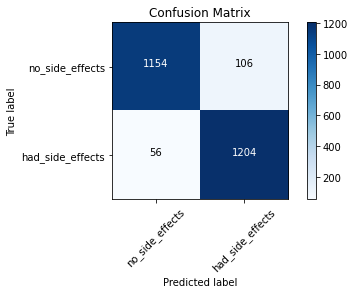

In [55]:
cm_plot_labels=['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')